<a href="https://colab.research.google.com/github/falahamro/Moral-Foundations-Analysis/blob/main/Feature_Importance_2_Mapping_Moral_Foundations_of_Republicans_and_Democrats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Moral Foundations Predictive Analysis**

What are the factors associated with the change in candidate moral identity and can we predict them

# Feature Importance

In [ ]:
!pip install shap 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

Random Forest

In [ ]:
campaign['Party'] = campaign['Party'].replace(['R','D'],['1','0'])

In [ ]:
campaign['Type'] = campaign['Type'].replace(['speech','statement', 'audio'],['1','0', '2'])

In [ ]:
X = train
y = campaign['Party']

In [ ]:
# Split the data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#le=LabelEncoder()
#campaign['Party']=le.fit_transform(campaign['Party'])

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(Xtrain, ytrain)

RandomForestRegressor()

In [ ]:
rf_train = rf_reg.score(Xtrain, ytrain)
rf_cv = cross_val_score(rf_reg, Xtrain, ytrain, cv=5).mean()
rf_test = rf_reg.score(Xtest, ytest)
print('Evaluation of the Random Forest performance\n')
print(f'Training score: {rf_train.round(4)}')
print(f'Cross validation score: {rf_cv.round(4)}')
print(f'Test score: {rf_test.round(4)}')

Evaluation of the Random Forest performance

Training score: 0.8654
Cross validation score: 0.1191
Test score: 0.1461


SHAp Values

In [ ]:
shap.initjs()

In [ ]:
# Create SHAP explainer
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X)

In [ ]:
# shap force plot for the first prediction
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [ ]:
# SHAP values for all predictions
shap.force_plot(explainer.expected_value, shap_values, X)

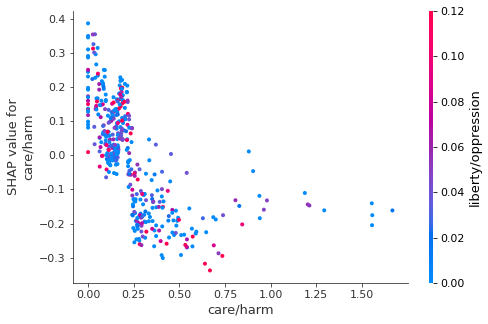

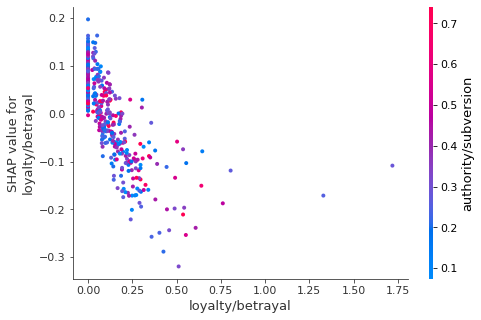

In [ ]:
# Effect of a single feature on the shap value,and automatically selected other feature to show dependence 
shap.dependence_plot('care/harm', shap_values, X)
shap.dependence_plot('loyalty/betrayal', shap_values, X)

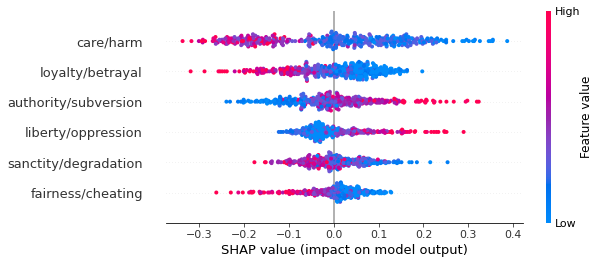

In [ ]:
# See how every feaure contributes to the model output
shap.summary_plot(shap_values, X)

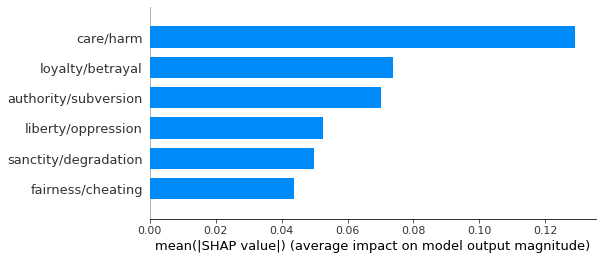

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")